# Plot sea level budgets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# For higher resolution images on retina display screens
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')


In [3]:
tg_sel = 'ZSM' # Tide gauge selection

In [4]:
budget_df = pd.read_csv('../outputs/slbudget_2022_06_14_ZSM_1950_2020_ERA5_StericIAP_2000m.csv')
budget_df.set_index('time', inplace=True)
../outputs/slbudget_2022_11_04_ZSM_altimetry1993_2020_ERA5_StericIAP_2000m.csv

In [5]:
budget_df

,Total,LocSteric,GloSteric,GIA,Glaciers,Antarctica,Greenland,TWS,Nodal,Wind,Pressure,Obs
time,,,,,,,,,,,,
1950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.685039
1951,-2.875594,-0.542652,0.097124,0.036833,0.054167,0.004167,0.006667,0.360000,0.007106,-3.372978,0.473973,1.151706
1952,-1.256545,-0.810007,0.176444,0.073667,0.115833,0.010000,0.011667,0.333333,-0.046784,-1.003212,-0.117487,3.585039
1953,-4.182959,-0.901233,0.177486,0.110500,0.186667,0.014167,0.017500,0.296667,-0.155587,-1.771216,-2.157909,-0.314961
1954,3.390950,-0.977007,0.193522,0.147333,0.242500,0.019167,0.020000,0.148333,-0.307016,3.685859,0.218257,2.451706
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,8.206191,2.283341,4.680546,2.431000,2.585833,0.835000,0.261667,-0.140000,-1.075985,-2.708465,-0.946746,14.701706
2017,12.636035,2.268953,4.838131,2.467833,2.657500,0.850833,0.269167,-0.684167,-1.030123,1.906213,-0.908306,18.218372
2018,7.042769,2.361251,4.889651,2.504667,2.677500,0.959167,0.276667,-0.811667,-0.928142,-4.027354,-0.858970,10.935039


In [12]:
def plot_budget(tg_sel, slmean_df):
    '''Summary plot of the sea level budget. Should be split in smaller functions.'''
    
    # Add 3 years rolling mean
    slmean_df = slmean_df.rolling(3, center=True).mean()
    
    ### Plot compaison between tide gauge observations and budget
    fig, ax = plt.subplots(1, 2, figsize=(9,4))

    ax[0].plot(slmean_df.Obs - slmean_df.Obs.mean(), '-', label='Tide gauge observations')
    ax[0].plot(slmean_df.Total - slmean_df.Total.mean() , '-', label='Sum of contributors')

    ax[0].set_ylabel('sea level (cm)')
    ax[0].set_title('Yearly average sea level at '+tg_sel)
    ax[0].grid(True)
    ax[0].legend(loc='upper left')

    ### Plot the difference between observations and budget
    diff_df = slmean_df.Obs - slmean_df.Total
    diff_df = diff_df - diff_df.mean()

    t = ('Normalised RMSE (cm): '+
         str( round(np.sqrt( (diff_df**2).sum() ) / len(diff_df), 2 ))+ '\n' +
         'Normalised AE (cm): '+
         str( round( np.abs(diff_df).sum() / len(diff_df),2)))
    ax[1].text(0.98, 0.98, t, ha='right', va='top', transform=ax[1].transAxes)
    ax[1].set_title('Difference observations - budget')
    ax[1].grid(True)
    ax[1].plot(diff_df)
    
    return fig, ax

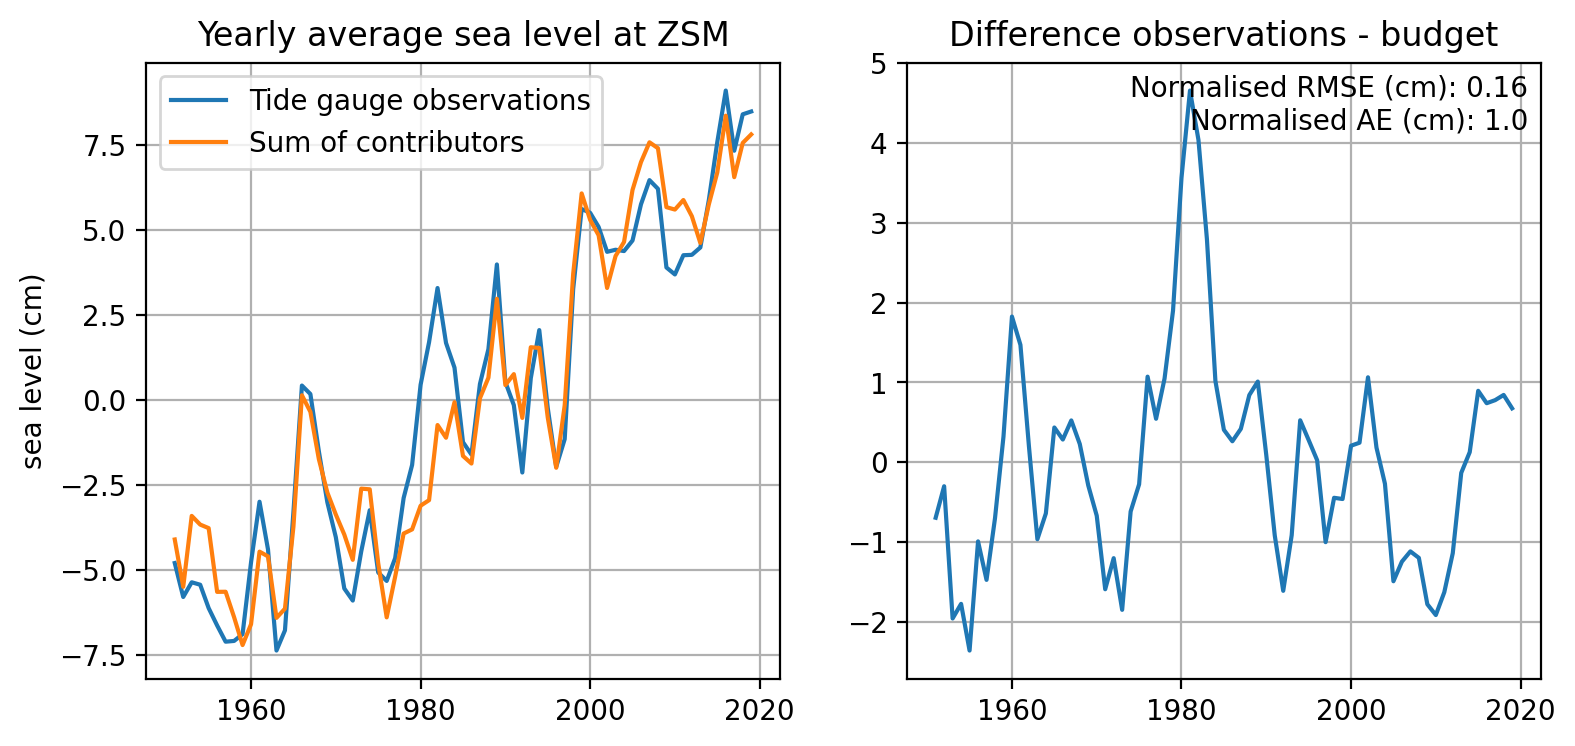

In [13]:
fig, ax = plot_budget(tg_sel, budget_df)

In [46]:
def plot_trend_budget(slmean_df):
    
    fig, ax = plt.subplots(1, 1, figsize=(4.5,4))
    
    lin_trend = np.polyfit(slmean_df.index, 
                           slmean_df * 10, 1)[0,:]  # Convert from cm to mm
    
    if 'Steric' in slmean_df.columns:
        colors = ['red', 'blue', 'green', 'brown', 'magenta', 'grey', 'orange', 
                  'black', 'cyan', 'yellow']
            
    else:  
        colors = ['red', 'blue', 'purple', 'green', 'brown', 'magenta', 'grey', 
                  'orange', 'black', 'cyan', 'olive']

    ind = np.arange(len(slmean_df.columns) - 1 )

    legend_elements = []
    for i in ind:
        legend_elements.append(Line2D([0], [0], color = colors[i], lw = 4, 
                                      label = slmean_df.columns[i]))

    legend_elements.append(Line2D([0], [0], color = 'black', lw = 2, 
                                  label = 'tg obs'))
    
    ax.set_title(f'Linear trend budget: {slmean_df.index[0]}-{slmean_df.index[-1]}')
    ax.bar(ind, lin_trend[:-1], color=colors)
    ax.hlines(y=lin_trend[-1], xmin=-0.5, xmax=0.5, color='black')
    ax.set_ylabel('Linear trend (mm/year)')
    ax.legend(handles=legend_elements, loc='upper right', prop={'size': 9})
    ax.set_ylim(-0.6, 3.0)
    ax.text(0.02, 0.01, 
                 f'Observed trend: {round(lin_trend[-1],2)}\n'+ 
                 f'Budget trend: {round(lin_trend[0],2)}', 
                 va='bottom', ha='left', 
                 transform=ax.transAxes)
    
    return fig, ax

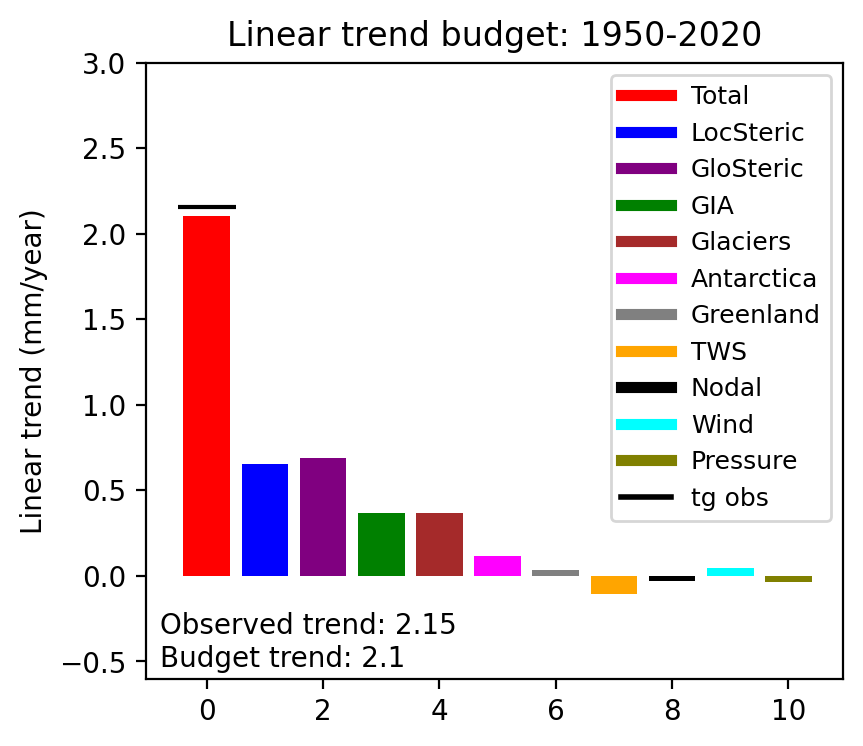

In [47]:
fig, ax = plot_trend_budget(budget_df)

In [48]:
budget_df.index[0], budget_df.index[-1]

(1950, 2020)

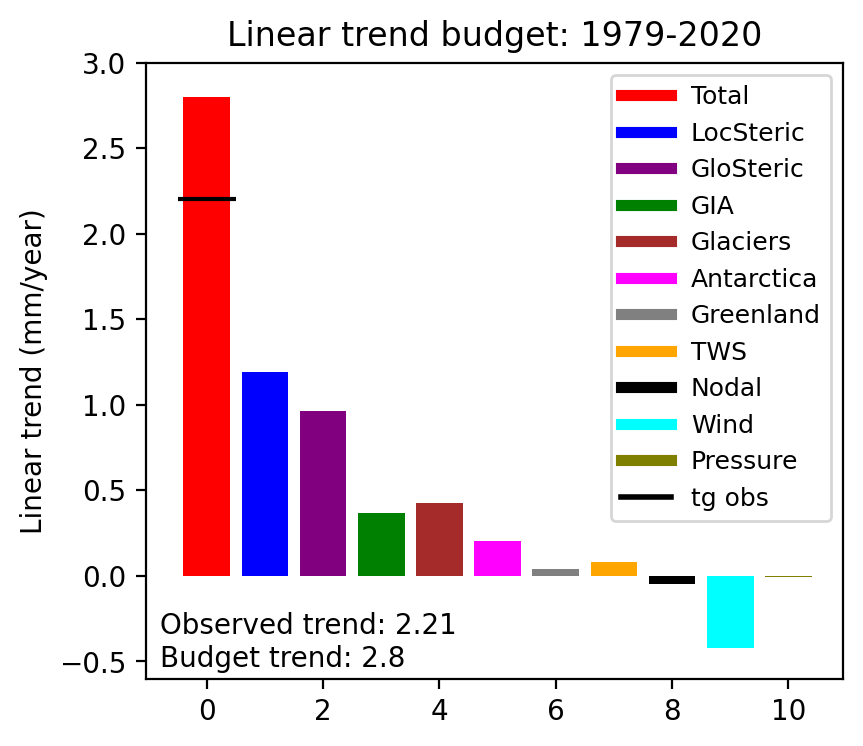

In [49]:
fig, ax = plot_trend_budget(budget_df.loc[1979:2020])